In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

satdata = "clean_data.csv"

satdata = pd.read_csv(satdata)
satdata.head()

,University,CITY,State,ZIP,LATITUDE,LONGITUDE,SAT_AVG_ALL,Total_EMP,Median_income,AVG_income
0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,1195,510560,37050,47480
1,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,1322,226330,39820,54630
2,Alabama State University,Montgomery,AL,36104-0271,32.364317,-86.295677,935,164030,33670,42510
3,The University of Alabama,Tuscaloosa,AL,35487-0166,33.211875,-87.545978,1278,102020,33740,41800
4,Auburn University at Montgomery,Montgomery,AL,36117-3596,32.367360,-86.177544,1083,164030,33670,42510


In [3]:
income_table = satdata[["State","ZIP", "SAT_AVG_ALL", "AVG_income"]]
income_table.head()

income_table = income_table.dropna(how='any')
income_table.head()



,State,ZIP,SAT_AVG_ALL,AVG_income
0,AL,35294-0110,1195,47480
1,AL,35899,1322,54630
2,AL,36104-0271,935,42510
3,AL,35487-0166,1278,41800
4,AL,36117-3596,1083,42510


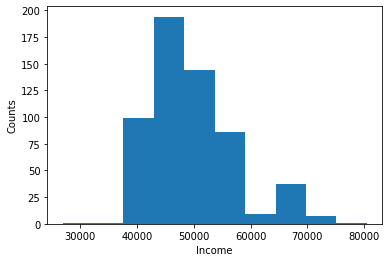

In [5]:
income_distribution = satdata['AVG_income']
plt.hist(income_distribution)
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

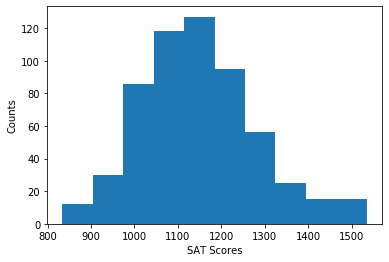

In [7]:
SAT_distribution = satdata['SAT_AVG_ALL']
plt.hist(SAT_distribution)
plt.xlabel('SAT Scores')
plt.ylabel('Counts')
plt.show()

In [41]:
SAT_summary =pd.DataFrame(satdata.groupby("State").count())


SAT_summary["Mean"] = pd.DataFrame(satdata.groupby("State")["SAT_AVG_ALL"].mean())
SAT_summary["Median"] = pd.DataFrame(satdata.groupby("State")["SAT_AVG_ALL"].median())
SAT_summary["Variance"] = pd.DataFrame(satdata.groupby("State")["SAT_AVG_ALL"].var())
SAT_summary["Std. Dev"] = pd.DataFrame(satdata.groupby("State")["SAT_AVG_ALL"].std())
SAT_summary["SEM"] = pd.DataFrame(satdata.groupby("State")["SAT_AVG_ALL"].sem())

SAT_summary = SAT_summary[["Mean","Median","Variance","Std. Dev", "SEM"]]



SAT_summary.head()


,Mean,Median,Variance,Std. Dev,SEM
State,,,,,
AK,1094.000000,1094.0,NaN,NaN,NaN
AL,1132.888889,1108.5,11156.928105,105.626361,24.896372
AR,1117.000000,1125.0,11238.000000,106.009434,47.408860
AZ,1151.000000,1218.0,10944.857143,104.617671,36.987932
CA,1162.888889,1142.0,17716.871795,133.104740,25.616019


In [11]:
SAT_Qrt = satdata['SAT_AVG_ALL']

quartiles_inc = SAT_Qrt.quantile([.25,.5,.75])
lowerq_inc = quartiles_inc[0.25]
upperq_inc = quartiles_inc[0.75]
iqr_inc = upperq_inc-lowerq_inc

print(f"The lower quartile of SAT scores is: {lowerq_inc}")
print(f"The upper quartile of SAT scores is: {upperq_inc}")
print(f"The interquartile range of SAT scores is: {iqr_inc}")
print(f"The the median of SAT scores is: {quartiles_inc[0.5]} ")

lower_bound_inc = lowerq_inc - (1.5*iqr_inc)
upper_bound_inc = upperq_inc + (1.5*iqr_inc)
print(f"Values below {lower_bound_inc} could be outliers.")
print(f"Values above {upper_bound_inc} could be outliers.")

The lower quartile of SAT scores is: 1059.0
The upper quartile of SAT scores is: 1221.0
The interquartile range of SAT scores is: 162.0
The the median of SAT scores is: 1134.0 
Values below 816.0 could be outliers.
Values above 1464.0 could be outliers.


In [42]:
income_summary =pd.DataFrame(satdata.groupby("State").count())


income_summary["Mean"] = pd.DataFrame(satdata.groupby("State")["AVG_income"].mean())
income_summary["Median"] = pd.DataFrame(satdata.groupby("State")["AVG_income"].median())
income_summary["Variance"] = pd.DataFrame(satdata.groupby("State")["AVG_income"].var())
income_summary["Std. Dev"] = pd.DataFrame(satdata.groupby("State")["AVG_income"].std())
income_summary["SEM"] = pd.DataFrame(satdata.groupby("State")["AVG_income"].sem())

income_summary = income_summary[["Mean","Median","Variance","Std. Dev", "SEM"]]



income_summary.head()

,Mean,Median,Variance,Std. Dev,SEM
State,,,,,
AK,57570.000000,57570,NaN,NaN,NaN
AL,44213.888889,42510,2.227806e+07,4719.964031,1112.506191
AR,42970.000000,45020,1.254055e+07,3541.263899,1583.701361
AZ,45775.000000,45235,2.005771e+07,4478.583960,1583.418544
CA,56138.148148,57890,6.838856e+07,8269.737712,1591.511765


In [10]:
Income_Qrt = satdata['AVG_income']

quartiles_inc = Income_Qrt.quantile([.25,.5,.75])
lowerq_inc = quartiles_inc[0.25]
upperq_inc = quartiles_inc[0.75]
iqr_inc = upperq_inc-lowerq_inc

print(f"The lower quartile of income is: {lowerq_inc}")
print(f"The upper quartile of income is: {upperq_inc}")
print(f"The interquartile range of income is: {iqr_inc}")
print(f"The the median of income is: {quartiles_inc[0.5]} ")

lower_bound_inc = lowerq_inc - (1.5*iqr_inc)
upper_bound_inc = upperq_inc + (1.5*iqr_inc)
print(f"Values below {lower_bound_inc} could be outliers.")
print(f"Values above {upper_bound_inc} could be outliers.")

The lower quartile of income is: 44570.0
The upper quartile of income is: 53380.0
The interquartile range of income is: 8810.0
The the median of income is: 47750.0 
Values below 31355.0 could be outliers.
Values above 66595.0 could be outliers.
